# Capstone Project - The Battle of Neighborhoods

## Introduction

Air quality is deteriorating over the last century with impacts on the heath of local citizens.

Nitrogen (oxides, monoxides and dioxide) are amongst the most dangerous for human health.

Citizens living in areas with high concentrations of nitrogens are more likely to become sick due to poor air quality.


**How can we provide information to citizens about the better areas to live in Italy in terms of air quality?**

**How can we cluster Italy areas in order to anticipate similar health issues in citizens living in similarly polluted areas?**


## Data

#### 1. Geographic coordinate of Italy Air Sampling Points

Sampling points are installed throughout Italy. Spatial data, together with measure values are taken from the **European Environment Agency**

Link to query: http://aidef.apps.eea.europa.eu/?source=%7B%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22term%22%3A%7B%22CountryOrTerritory%22%3A%22Italy%22%7D%7D%2C%7B%22term%22%3A%7B%22ReportingYear%22%3A%222018%22%7D%7D%2C%7B%22term%22%3A%7B%22Verification%22%3A%22Verified%22%7D%7D%2C%7B%22term%22%3A%7B%22Pollutant%22%3A%22Nitrogen%20dioxide%20(air)%22%7D%7D%2C%7B%22term%22%3A%7B%22AggregationType%22%3A%22Annual%20mean%20%2F%201%20calendar%20year%22%7D%7D%5D%7D%7D%2C%22display_type%22%3A%22tabular%22%7D

#### 2. Concentrations of Nitrogens in Air - 2018 Italy Mean by Sampling Point

The **European Environment Agency** also provide, together with other data that have been ignored in this excercise, concentrantion of contaminats by sampling point

Link to query: http://aidef.apps.eea.europa.eu/?source=%7B%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22term%22%3A%7B%22CountryOrTerritory%22%3A%22Italy%22%7D%7D%2C%7B%22term%22%3A%7B%22ReportingYear%22%3A%222018%22%7D%7D%2C%7B%22term%22%3A%7B%22Verification%22%3A%22Verified%22%7D%7D%2C%7B%22term%22%3A%7B%22Pollutant%22%3A%22Nitrogen%20dioxide%20(air)%22%7D%7D%2C%7B%22term%22%3A%7B%22AggregationType%22%3A%22Annual%20mean%20%2F%201%20calendar%20year%22%7D%7D%5D%7D%7D%2C%22display_type%22%3A%22tabular%22%7D

## Methodology: Data Elaboration

**1. Reading Dataset from the European Environment Agency**

In [1]:
#Importing all needed libraries --- also for the next steps
import types
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2ee94fbe64ba4a4392629b650b9659f4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1djD5VEoivBqAjBMa3zL15NxkZTnHRzDnGdmbaNlY49L',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2ee94fbe64ba4a4392629b650b9659f4.get_object(Bucket='datasciencecapstone-donotdelete-pr-owfzbe0ggmq64t',Key='NitrogensMeans2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,Unit,BeginPosition,EndPosition,Validity,Verification,DataCoverage,DataCapture,TimeCoverage,AQValue
0,Italy,2018,2019-10-29T22:23:39.82Z,STA.IT1159A,SPO.IT1159A_38_chemi_1998-01-02_00:00:00,44.499720,11.328330,Nitrogen monoxide (air),Annual mean / 1 calendar year,IT.ISPRA.AQD,ug.m-3,2018-01-01,2019-01-01,Valid,Verified,95.182648,100,95.182648,22.998201
1,Italy,2018,2019-10-29T22:23:39.82Z,STA.IT1728A,SPO.IT1728A_38_chemi_2004-03-01_00:00:00,42.552220,12.651670,Nitrogen monoxide (air),Annual mean / 1 calendar year,IT.ISPRA.AQD,ug.m-3,2018-01-01,2019-01-01,Valid,Verified,96.643836,100,96.643836,6.416513
2,Italy,2018,2019-10-29T22:23:39.82Z,STA.IT2252A,SPO.IT2252A_38_chemi_2016-05-18_00:00:00,42.081825,11.809336,Nitrogen monoxide (air),Annual mean / 1 calendar year,IT.ISPRA.AQD,ug.m-3,2018-01-01,2019-01-01,Valid,Verified,95.228310,100,95.228310,2.512227
3,Italy,2018,2019-10-29T22:23:39.82Z,STA.IT2064A,SPO.IT2064A_38_chemi_2009-06-20_00:00:00,43.273889,12.611667,Nitrogen monoxide (air),Annual mean / 1 calendar year,IT.ISPRA.AQD,ug.m-3,2018-01-01,2019-01-01,Valid,Verified,92.089041,100,92.089041,4.297892
4,Italy,2018,2019-10-29T22:23:39.82Z,STA.IT1152A,SPO.IT1152A_38_chemi_2001-01-01_00:00:00,44.799430,10.883650,Nitrogen monoxide (air),Annual mean / 1 calendar year,IT.ISPRA.AQD,ug.m-3,2018-01-01,2019-01-01,Valid,Verified,98.470320,100,98.470320,13.022490


**2. Check if the "Unit of Measure" is UNIQUE**

In [2]:
#List of Unique Values for UNIT
list(df1['Unit'].unique())

['ug.m-3']

**YES!** The same unit of measure applies throughout the dataset. Hence **no scaling is needed**.

**3. Understand the shape of the dataframe**

In [3]:
print('Dafaframe 1 Shape (nr of rows and colums): ')
df1.shape

Dafaframe 1 Shape (nr of rows and colums): 


(1137, 19)

**Refining dataset in order to keep only:**
 - StationLocalId
 - SamplingPoint_Latitude
 - SamplingPoint_Longitude
 - Pollutant
 - AQValue

In [4]:
df2 = df1[['StationLocalId','SamplingPoint_Latitude','SamplingPoint_Longitude','Pollutant','AQValue']]
df2.head()

,StationLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AQValue
0,STA.IT1159A,44.499720,11.328330,Nitrogen monoxide (air),22.998201
1,STA.IT1728A,42.552220,12.651670,Nitrogen monoxide (air),6.416513
2,STA.IT2252A,42.081825,11.809336,Nitrogen monoxide (air),2.512227
3,STA.IT2064A,43.273889,12.611667,Nitrogen monoxide (air),4.297892
4,STA.IT1152A,44.799430,10.883650,Nitrogen monoxide (air),13.022490


Here some consideration on the data structure:
- Pollutants and related values are in rows, intersected by columns "Pollutant" and "AQValue". 
- The type of pollutant needs to be moved to columns, in orders that rows will contain only the value for each pollutant.

**4. The dataframe is split into two**:
1. df3 to host Samling Point ID, its Latitute and its Longitute
2. df4 to host Pollutants and their Concentrations by Samling Point ID

*Definition of df3*

In [5]:
df3 = df1[['StationLocalId','SamplingPoint_Latitude','SamplingPoint_Longitude']]
df3.head()

,StationLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude
0,STA.IT1159A,44.499720,11.328330
1,STA.IT1728A,42.552220,12.651670
2,STA.IT2252A,42.081825,11.809336
3,STA.IT2064A,43.273889,12.611667
4,STA.IT1152A,44.799430,10.883650


In [6]:
print('Dafaframe 3 Shape (nr of rows and colums): ')
df3.shape

Dafaframe 3 Shape (nr of rows and colums): 


(1137, 3)

*Only unique records are retained, as it makes no sense to keep multiple equal records for the same Saple Point*

In [7]:
df3.drop_duplicates(inplace=True)
df3.sort_values(by=['StationLocalId'])
df3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,StationLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude
0,STA.IT1159A,44.499720,11.328330
1,STA.IT1728A,42.552220,12.651670
2,STA.IT2252A,42.081825,11.809336
3,STA.IT2064A,43.273889,12.611667
4,STA.IT1152A,44.799430,10.883650


In [8]:
print('Dafaframe 3 Shape (nr of rows and colums): ')
df3.shape

Dafaframe 3 Shape (nr of rows and colums): 


(603, 3)

The number of rows is much lower than defore due to the removal of duplicated lines. We have 603 Sampling Points through Italy

*Definition of df4*

In [9]:
df4 = df1[['StationLocalId','Pollutant','AQValue']]
df4.head(10)

,StationLocalId,Pollutant,AQValue
0,STA.IT1159A,Nitrogen monoxide (air),22.998201
1,STA.IT1728A,Nitrogen monoxide (air),6.416513
2,STA.IT2252A,Nitrogen monoxide (air),2.512227
3,STA.IT2064A,Nitrogen monoxide (air),4.297892
4,STA.IT1152A,Nitrogen monoxide (air),13.022490
5,STA.IT1590A,Nitrogen monoxide (air),16.960381
6,STA.IT1596A,Nitrogen monoxide (air),6.368159
7,STA.IT0861A,Nitrogen monoxide (air),51.916251
8,STA.IT1273A,Nitrogen monoxide (air),0.501961
9,STA.IT2203A,Nitrogen monoxide (air),1.616236


*Reshaping dataframe in order to move to columns the type of pollutant*

In [10]:
df5 = df4.pivot_table('AQValue', ['StationLocalId'], 'Pollutant')
df5.head(10)

Pollutant,Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air)
StationLocalId,,,
STA.IT0063A,14.939116,2.973279,19.491825
STA.IT0187A,37.588794,23.639182,72.853887
STA.IT0267A,24.291143,NaN,NaN
STA.IT0448A,28.281029,14.652279,49.823091
STA.IT0459A,29.447774,NaN,NaN
STA.IT0460A,27.610241,NaN,NaN
STA.IT0461A,27.202162,NaN,NaN
STA.IT0469A,51.899691,NaN,NaN
STA.IT0470A,56.016281,NaN,NaN


**5. NaN are dropped from the dataframe: Only Sampling Points where values for all Nitrogens are available are finally retained**

In [11]:
df5.dropna(inplace = True)
df5.head(10)

Pollutant,Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air)
StationLocalId,,,
STA.IT0063A,14.939116,2.973279,19.491825
STA.IT0187A,37.588794,23.639182,72.853887
STA.IT0448A,28.281029,14.652279,49.823091
STA.IT0502A,39.826836,33.981320,91.930023
STA.IT0505A,3.066276,0.253706,3.461377
STA.IT0507A,28.089936,22.857049,63.135714
STA.IT0508A,20.445410,12.065053,38.943789
STA.IT0544A,16.671627,7.614835,28.085843
STA.IT0663A,19.067990,6.506121,28.037560


In [12]:
df6 = df5.reset_index(drop=False)
df6.columns.name=''
df6.head()

,StationLocalId,Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air)
0,STA.IT0063A,14.939116,2.973279,19.491825
1,STA.IT0187A,37.588794,23.639182,72.853887
2,STA.IT0448A,28.281029,14.652279,49.823091
3,STA.IT0502A,39.826836,33.981320,91.930023
4,STA.IT0505A,3.066276,0.253706,3.461377


In [13]:
print('Dafaframe 6 Shape (nr of rows and colums): ')
df6.shape

Dafaframe 6 Shape (nr of rows and colums): 


(233, 4)

**6. The two dataframe are merged into a new one, where for each sampling point, pollutant values are added together with its Longitude and Latitude**

In [14]:
df7 = df6.join(df3.set_index('StationLocalId'), on='StationLocalId')
df7.head()

,StationLocalId,Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),SamplingPoint_Latitude,SamplingPoint_Longitude
0,STA.IT0063A,14.939116,2.973279,19.491825,42.939167,10.534167
1,STA.IT0187A,37.588794,23.639182,72.853887,44.842500,11.613060
2,STA.IT0448A,28.281029,14.652279,49.823091,45.429444,12.313889
3,STA.IT0502A,39.826836,33.981320,91.930023,46.482310,11.341830
4,STA.IT0505A,3.066276,0.253706,3.461377,46.589670,11.433170


In [15]:
print('Dafaframe 7 Shape (nr of rows and colums): ')
df7.shape

Dafaframe 7 Shape (nr of rows and colums): 


(233, 6)

Dataframe 7 is now the join of df6 (pollutants) and df3 (longitude & latidute)

Join occurred on StationLocalId, common element between the two dataset

## Methodology: Elaboration of Spatial Data

In [16]:
#Import Relevant Libraries
!conda install -c conda-forge folium
import folium
from folium.plugins import MarkerCluster

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [17]:
# Get MAX and MIN values for Latitude and Longitude (using df7)
maxLat = df7.max()['SamplingPoint_Latitude']
minLat = df7.min()['SamplingPoint_Latitude']
maxLon = df7.max()['SamplingPoint_Longitude']
minLon = df7.min()['SamplingPoint_Longitude']
avgLat = df7.mean()['SamplingPoint_Latitude']
avgLon = df7.mean()['SamplingPoint_Longitude']
print('MAX LAT: ',maxLat)
print('MIN LAT: ',minLat)
print('MAX LON: ',maxLon)
print('MAX LON: ',minLon)
print('AVG LON: ',avgLat)
print('AVG LON: ',avgLon)

MAX LAT:  46.79734
MIN LAT:  39.066667
MAX LON:  16.548431
MAX LON:  8.275278
AVG LON:  43.17195562231764
AVG LON:  11.742869712446343


In [18]:
locations = df7[['SamplingPoint_Latitude', 'SamplingPoint_Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

233

**Display on the Map the list of Sample Points:**
it should ensure global and consistent coverage throughout the territory

In [19]:
# create a plain world map
ItalyMap = folium.Map(location=[avgLat, avgLon], zoom_start=6)

# display sampling points in map

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup = df2['StationLocalId'][point]).add_to(ItalyMap)

# display map
ItalyMap

As a number of datapoints were removed, not all sampling point are to be considered relevant.
As shown in the map, the north-west side and south are not adequately covered.
This needs to be taken into consideration when analyzing and interpreting the results

**A column reporting the total amount of Nitrogens is added to the dataframe**

In [20]:
df7['Total_Nitrogens'] = np.round(df7['Nitrogen dioxide (air)'] + df7['Nitrogen monoxide (air)'] + df7['Nitrogen oxides (air)'],decimals=0)
df7.head()

,StationLocalId,Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),SamplingPoint_Latitude,SamplingPoint_Longitude,Total_Nitrogens
0,STA.IT0063A,14.939116,2.973279,19.491825,42.939167,10.534167,37.0
1,STA.IT0187A,37.588794,23.639182,72.853887,44.842500,11.613060,134.0
2,STA.IT0448A,28.281029,14.652279,49.823091,45.429444,12.313889,93.0
3,STA.IT0502A,39.826836,33.981320,91.930023,46.482310,11.341830,166.0
4,STA.IT0505A,3.066276,0.253706,3.461377,46.589670,11.433170,7.0


**A new dataframe with Total Nitrogens by location is elaborated as "df8"**

In [21]:
df8 = df7.drop(columns = ['StationLocalId','Nitrogen dioxide (air)','Nitrogen monoxide (air)','Nitrogen oxides (air)'])
df8.head()

,SamplingPoint_Latitude,SamplingPoint_Longitude,Total_Nitrogens
0,42.939167,10.534167,37.0
1,44.842500,11.613060,134.0
2,45.429444,12.313889,93.0
3,46.482310,11.341830,166.0
4,46.589670,11.433170,7.0


In [22]:
#Import Relevant Libraries
from sklearn.cluster import KMeans
print('K-Means imported!')

K-Means imported!


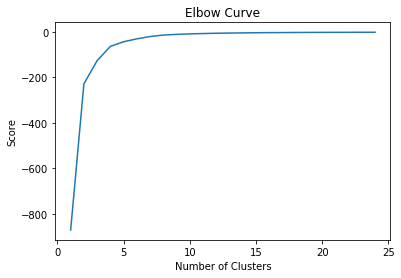

In [23]:
K_clusters = range(1,25)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df8[['SamplingPoint_Latitude']]
X_axis = df8[['SamplingPoint_Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

When we graph the plot, we see that the graph levels off slowly after 4 clusters. This implies that addition of more clusters will not help much.

**K-MEANS Clustering is Performed: the cluster number id added in a dedicated column of the dataframe**

In [24]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(df8[df8.columns[1:3]]) # Compute k-means clustering.
df8['Cluster_Label'] = kmeans.fit_predict(df8[df8.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df8[df8.columns[1:3]]) # Labels of each point
df8.head(10)

,SamplingPoint_Latitude,SamplingPoint_Longitude,Total_Nitrogens,Cluster_Label
0,42.939167,10.534167,37.0,3
1,44.842500,11.613060,134.0,2
2,45.429444,12.313889,93.0,1
3,46.482310,11.341830,166.0,2
4,46.589670,11.433170,7.0,3
5,46.714920,11.654080,114.0,2
6,46.797340,11.944030,71.0,1
7,44.823890,9.830280,52.0,1
8,45.714444,11.368611,54.0,1
9,44.636050,10.904730,147.0,2


In [25]:
df8.sort_values(by=['Cluster_Label'],inplace=True)
df8.head(10)

,SamplingPoint_Latitude,SamplingPoint_Longitude,Total_Nitrogens,Cluster_Label
232,46.68756,11.63331,334.0,0
135,41.86417,12.46944,227.0,0
13,41.88306,12.50889,185.0,0
12,41.94750,12.46972,214.0,0
132,41.91028,12.54889,190.0,0
16,43.77306,11.27222,252.0,0
70,41.62000,13.33083,175.0,0
161,44.54121,10.81890,193.0,0
101,43.94083,10.90528,69.0,1
98,43.91611,11.00694,61.0,1


**Clusters are displayed on a map:**
- Clusters of the same color should have approximately the same shape
- This means that clustering have been performed by Concentration Levels

In [26]:
# create a plain world map
ItalyMap2 = folium.Map(location=[avgLat, avgLon], zoom_start=6)

colordict = {0: 'blue', 1: 'purple', 2: 'grey', 3: 'violet'}

for lat, lon, nitrogens, cluster in zip(df8['SamplingPoint_Latitude'], df8['SamplingPoint_Longitude'], df8['Total_Nitrogens'], df8['Cluster_Label']):
    folium.CircleMarker(
        [lat, lon],
        radius=.1*nitrogens,
        popup = ('Total Nitrogens: ' + str(nitrogens).capitalize() + '<br>'
                 'Cluster: ' + str(cluster) + '<br>'
                ),
        color='b',
        key_on = cluster,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[cluster],
        fill=True,
        fill_opacity=0.7
        ).add_to(ItalyMap2)
ItalyMap2

**The same clusters are reported in another map where:**
- clusters have all the same size
- color coding is assigned as follows 0: 'green', 1: 'lightgreen', 2: 'yellow', 3: 'orange'
- **assumption:** the bigger the cluster the higher the concentration

In [27]:
# create a plain world map
ItalyMap3 = folium.Map(location=[avgLat, avgLon], zoom_start=6)

colordict = {0: 'green', 1: 'lightgreen', 2: 'yellow', 3: 'orange'}

for lat, lon, nitrogens, cluster in zip(df8['SamplingPoint_Latitude'], df8['SamplingPoint_Longitude'], df8['Total_Nitrogens'], df8['Cluster_Label']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('Total Nitrogens: ' + str(nitrogens).capitalize() + '<br>'
                 'Cluster: ' + str(cluster) + '<br>'
                ),
        color='b',
        key_on = cluster,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[cluster],
        fill=True,
        fill_opacity=0.7
        ).add_to(ItalyMap3)
ItalyMap3

**A split of the dataset by quartile is performed in order to verify if clustering the dataset provides added value**

In [28]:
df8['Total_Nitrogens'].describe()

count    233.000000
mean      68.193133
std       48.784020
min        2.000000
25%       31.000000
50%       59.000000
75%       93.000000
max      334.000000
Name: Total_Nitrogens, dtype: float64

In [29]:
df8['Quartile'] = pd.qcut(df8['Total_Nitrogens'], 4, labels=False)
df9 = df8.sort_values(by=['Quartile'])
df9

,SamplingPoint_Latitude,SamplingPoint_Longitude,Total_Nitrogens,Cluster_Label,Quartile
211,42.931940,10.524170,30.0,3,0
172,39.311111,8.541389,18.0,3,0
187,43.927500,12.224722,11.0,3,0
176,39.224167,8.432500,10.0,3,0
174,39.546670,8.794170,29.0,3,0
110,44.299722,10.430278,10.0,3,0
107,43.868890,10.453610,23.0,3,0
156,43.932778,12.627500,19.0,3,0
157,44.013056,12.420000,23.0,3,0
90,40.237220,9.032500,18.0,3,0


As shown above, clusters and quirtiles do not perfectly overlap

**Quartiles are displayed on a map.**

This to provide insight that could be achieved from data visualization.
The color coding assigned is the same attributed to clusters, i.e.: {0: 'green', 1: 'lightgreen', 2: 'yellow', 3: 'orange'}

In [30]:
# create a plain world map
ItalyMap4 = folium.Map(location=[avgLat, avgLon], zoom_start=6)

colordict = {0: 'green', 1: 'lightgreen', 2: 'yellow', 3: 'orange'}

for lat, lon, nitrogens, quartile in zip(df9['SamplingPoint_Latitude'], df9['SamplingPoint_Longitude'], df9['Total_Nitrogens'], df9['Quartile']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = ('Total Nitrogens: ' + str(nitrogens).capitalize() + '<br>'
                 'Quartile: ' + str(quartile) + '<br>'
                ),
        color='b',
        key_on = quartile,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[quartile],
        fill=True,
        fill_opacity=0.7
        ).add_to(ItalyMap4)
ItalyMap4

## Conculsion

Although not perfectly overlapping with clusters, the binning of the dataset into quartiles confirms the same pattern:
- Areas close to big centres (e.g. Rome, Florence and Bologna) are the most polluted, 
- Together with the north-east side of the country, the most dense in terms of factories 
- And the Pianura Padana plane

## Final Remarks

**For the case into consideration K-means clustering doesn’t really provide added value compared to a more basic categorization of sampling point quartiles based on the concentration of pollutants detected.**

This means that the model needs to be further refined in order to include additional drivers such as number of inhabitants and related age.

This can determine the identification of homogeneous clusters to be used to address health issues:
- Clusters where concentration of pollutants is high, the number of inhabitants is high and the average age is high as well should be tacked differently from a cluster where concentration of pollutants is still high, but the number of inhabitants and related aging is lower.
